In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [74]:
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
df.shape

(20640, 10)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [77]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Tratamento de valores ausentes

In [78]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [79]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [80]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Distribuição de dados usando histogramas

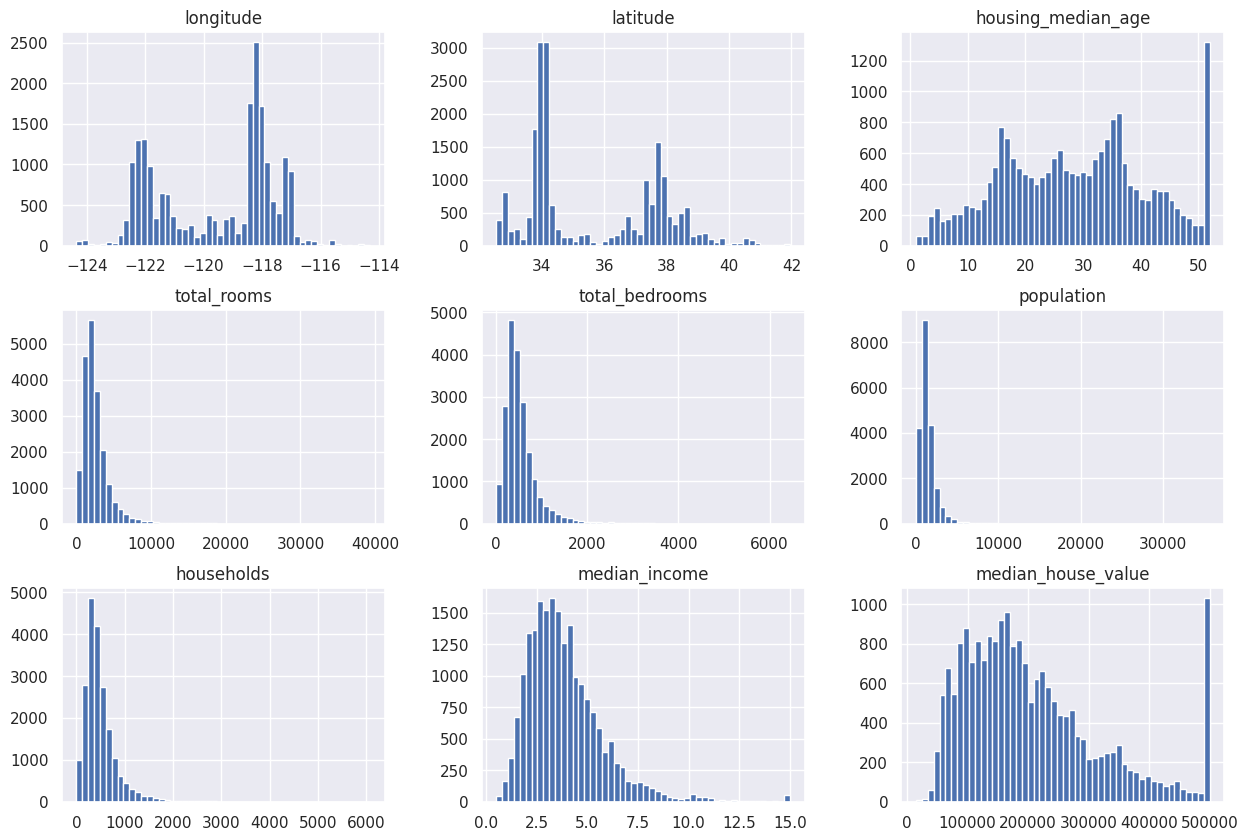

In [81]:
df.hist(figsize=(15, 10), bins=50)
plt.show()

In [82]:
#Tratamento de valores discrepantes
df = df.loc[df['housing_median_age'] != 52, :]
df = df.loc[df['median_house_value'] != 500001, :]

Podemos ver dois valores discrepantes nos gráficos **mediand_house_value** e **Housing_median_age**. Além disso, cinco de nossas colunas são distribuídas quase normalmente com inclinação.

As escalas de nossos dados são diferentes, portanto, o dimensionamento também melhorará o desempenho. Devemos combinar três recursos distribuídos de forma semelhante: **total_rooms**, **total_bedrooms** e **Households** em um.

In [83]:
cor = df.drop('ocean_proximity', axis=1).corr()
cor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.922726,-0.033877,0.035260,0.064577,0.090809,0.050621,-0.016145,-0.022165
latitude,-0.922726,1.000000,-0.051961,-0.027165,-0.064256,-0.106927,-0.070068,-0.075305,-0.172126
housing_median_age,-0.033877,-0.051961,1.000000,-0.374710,-0.329182,-0.280775,-0.310576,-0.202770,0.014772
total_rooms,0.035260,-0.027165,-0.374710,1.000000,0.932132,0.860083,0.921867,0.223310,0.152606
total_bedrooms,0.064577,-0.064256,-0.329182,0.932132,1.000000,0.876338,0.973670,0.021094,0.079273
population,0.090809,-0.106927,-0.280775,0.860083,0.876338,1.000000,0.910626,0.040534,0.021616
households,0.050621,-0.070068,-0.310576,0.921867,0.973670,0.910626,1.000000,0.045643,0.100220
median_income,-0.016145,-0.075305,-0.202770,0.223310,0.021094,0.040534,0.045643,1.000000,0.661039
median_house_value,-0.022165,-0.172126,0.014772,0.152606,0.079273,0.021616,0.100220,0.661039,1.000000


<Axes: >

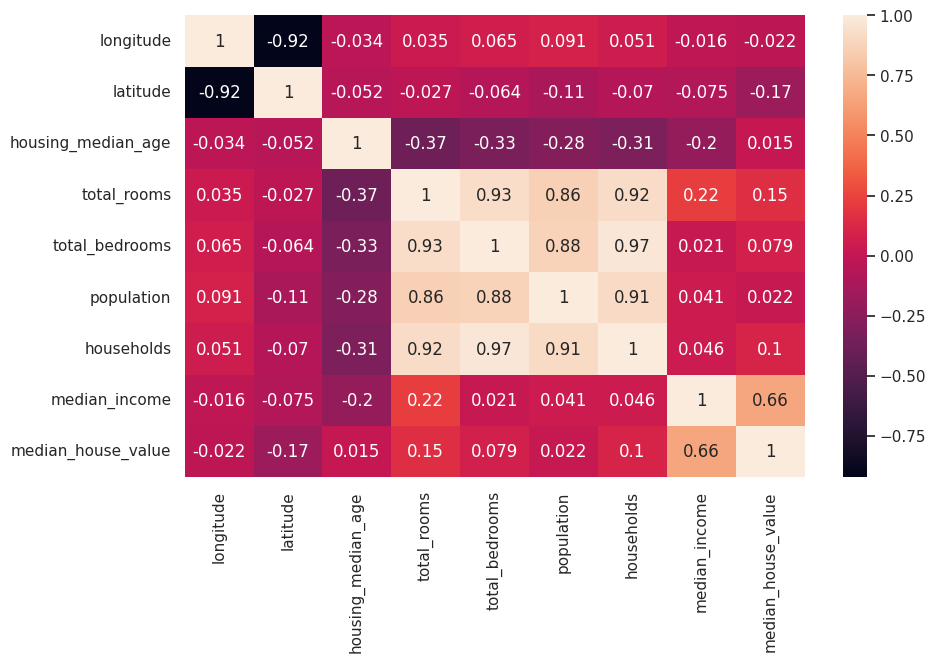

In [84]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(cor, annot=True)

Podemos ver que o **total de quartos**, o **total de quartos** e a **população** estão altamente correlacionados. Eles também são distribuídos de forma semelhante, portanto podemos assumir que apresentam informações semelhantes. Seria melhor combiná-los em um único recurso.

Nosso valor alvo **median_house_value** está altamente correlacionado com **median_income**.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

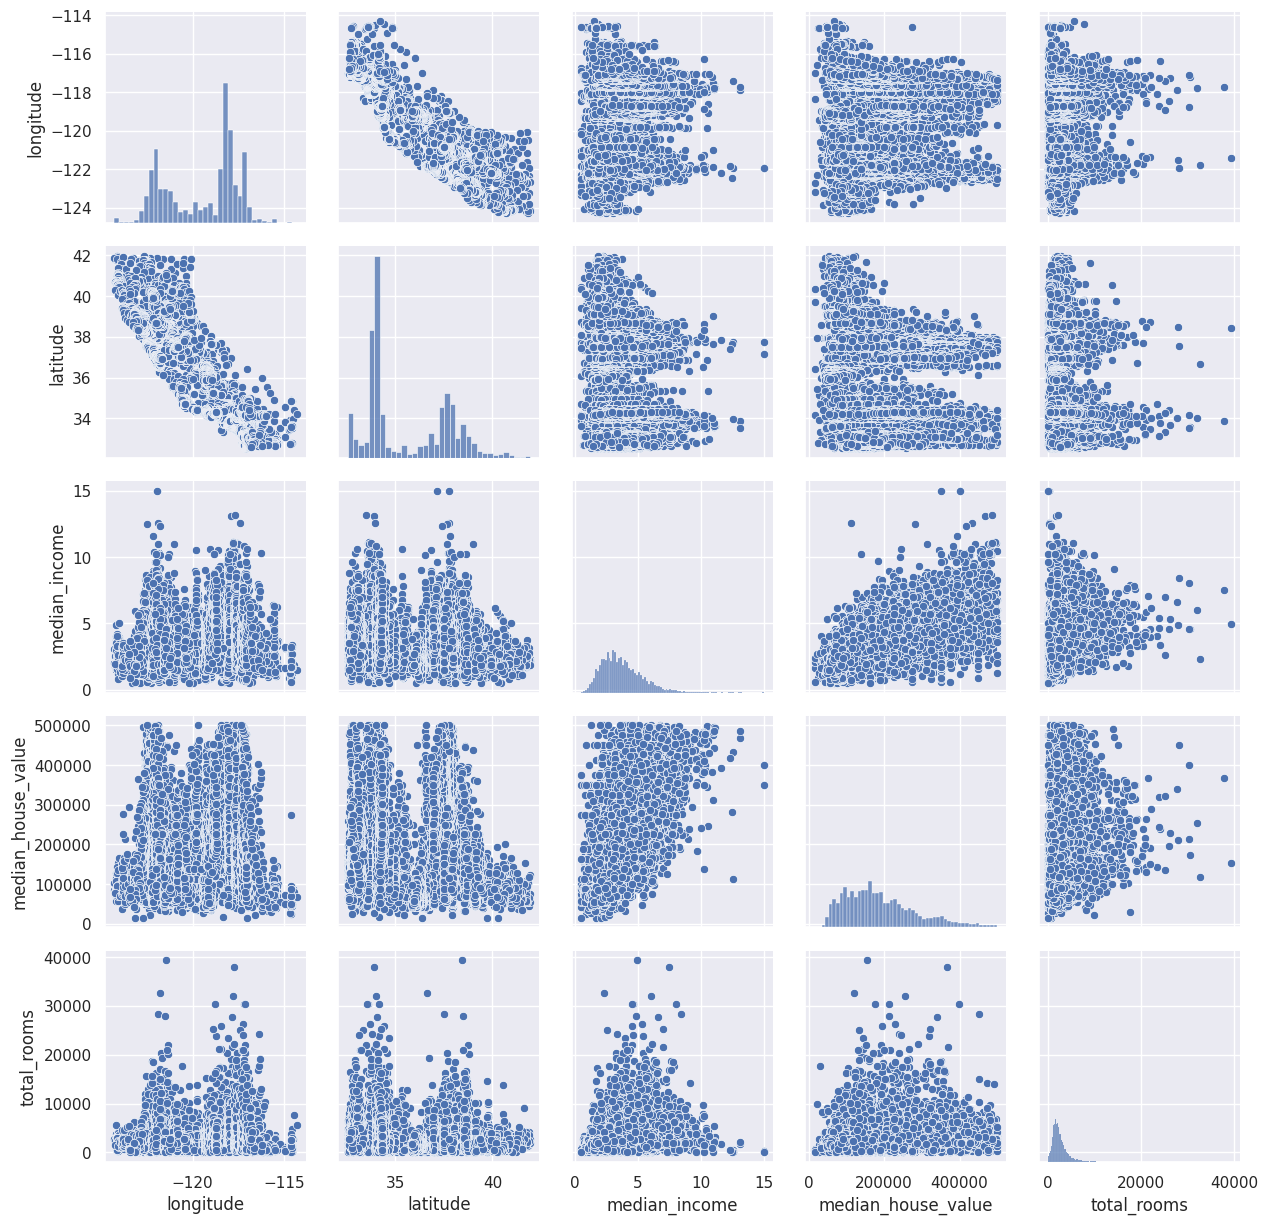

In [85]:
features = ['longitude', 'latitude', 'median_income', 'median_house_value', 'total_rooms', 'ocean_proximity']
g = sns.PairGrid(df[features])
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot, lw=3, legend=False)

A relação entre **median_house_value** e **latitude** e **longitude** parece complexa. Tentaremos combinar alguns recursos para obter relações mais lineares.

# Recursos

In [86]:
df['coord'] = -(df['longitude'] + df['latitude'])
df['bedperroom'] = df['total_bedrooms'] / df['total_rooms']

In [87]:
df.drop('ocean_proximity', axis=1).corr()['median_house_value']

longitude            -0.022165
latitude             -0.172126
housing_median_age    0.014772
total_rooms           0.152606
total_bedrooms        0.079273
population            0.021616
households            0.100220
median_income         0.661039
median_house_value    1.000000
coord                 0.499587
bedperroom           -0.207446
Name: median_house_value, dtype: float64

Agora temos uma boa correlação entre o valor alvo e as coordenadas. Podemos ver que a **ocean_proximity** é importante.

<Axes: xlabel='median_income', ylabel='median_house_value'>

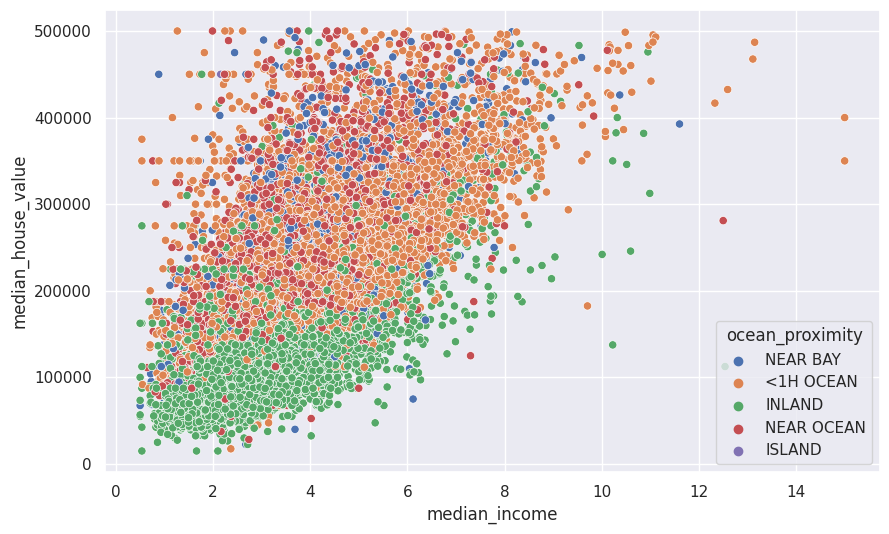

In [88]:
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='ocean_proximity')

In [89]:
df['bedperroom'] = df['total_bedrooms']/df['total_rooms']
X = df.drop(['total_rooms', 'total_bedrooms', 'longitude', 'latitude', 'median_house_value'], axis=1)
y = df['median_house_value']

# Pré-processando

In [90]:
X

,housing_median_age,population,households,median_income,ocean_proximity,coord,bedperroom
0,41.0,322.0,126.0,8.3252,NEAR BAY,84.35,0.146591
1,21.0,2401.0,1138.0,8.3014,NEAR BAY,84.36,0.155797
8,42.0,1206.0,595.0,2.0804,NEAR BAY,84.42,0.260274
15,50.0,697.0,264.0,2.1250,NEAR BAY,84.41,0.252679
18,50.0,990.0,419.0,1.9911,NEAR BAY,84.42,0.203216
...,...,...,...,...,...,...,...
20635,25.0,845.0,330.0,1.5603,INLAND,81.61,0.224625
20636,18.0,356.0,114.0,2.5568,INLAND,81.72,0.215208
20637,17.0,1007.0,433.0,1.7000,INLAND,81.79,0.215173
20638,18.0,741.0,349.0,1.8672,INLAND,81.89,0.219892


In [91]:
numeric_features = ['housing_median_age', 'population', 'households', 
                     'median_income', 'coord', 'bedperroom']

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[numeric_features])
X[numeric_features] = scaler.transform(X[numeric_features])

In [93]:
X

,housing_median_age,population,households,median_income,ocean_proximity,coord,bedperroom
0,0.80,0.008941,0.020395,0.539668,NEAR BAY,0.797368,0.045462
1,0.40,0.067210,0.186842,0.538027,NEAR BAY,0.798684,0.049620
8,0.82,0.033717,0.097533,0.108998,NEAR BAY,0.806579,0.096809
15,0.98,0.019451,0.043092,0.112074,NEAR BAY,0.805263,0.093378
18,0.98,0.027663,0.068586,0.102840,NEAR BAY,0.806579,0.071038
...,...,...,...,...,...,...,...
20635,0.48,0.023599,0.053947,0.073130,INLAND,0.436842,0.080707
20636,0.34,0.009894,0.018421,0.141853,INLAND,0.451316,0.076454
20637,0.32,0.028140,0.070888,0.082764,INLAND,0.460526,0.076438
20638,0.34,0.020684,0.057072,0.094295,INLAND,0.473684,0.078570


# Codificando recursos categóricos

In [94]:
X = pd.concat([X.drop('ocean_proximity', axis=1), pd.get_dummies(X['ocean_proximity']).astype(int)], axis=1)

In [95]:
X

,housing_median_age,population,households,median_income,coord,bedperroom,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.80,0.008941,0.020395,0.539668,0.797368,0.045462,0,0,0,1,0
1,0.40,0.067210,0.186842,0.538027,0.798684,0.049620,0,0,0,1,0
8,0.82,0.033717,0.097533,0.108998,0.806579,0.096809,0,0,0,1,0
15,0.98,0.019451,0.043092,0.112074,0.805263,0.093378,0,0,0,1,0
18,0.98,0.027663,0.068586,0.102840,0.806579,0.071038,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,0.48,0.023599,0.053947,0.073130,0.436842,0.080707,0,1,0,0,0
20636,0.34,0.009894,0.018421,0.141853,0.451316,0.076454,0,1,0,0,0
20637,0.32,0.028140,0.070888,0.082764,0.460526,0.076438,0,1,0,0,0
20638,0.34,0.020684,0.057072,0.094295,0.473684,0.078570,0,1,0,0,0


Previsão

# Regressão

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
print(np.sqrt(mse))
print(mean_absolute_error(y_pred, y_test))

3220796836.7201905
56752.0646031507
41591.06438833905


Temos rmse = 58852.

# Árvores de decisão

In [98]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
print(np.sqrt(mse))
print(mean_absolute_error(y_pred, y_test))

4825856812.113324
69468.38714201823
48435.72032301481


A árvore de decisão aqui mostrou resultados piores que a regressão linear

# Gradient Boosting
Aumento de gradiente

O Gradient Boosting é uma técnica de aprendizado de máquina

In [99]:
from catboost import CatBoostRegressor, Pool, cv
cat = CatBoostRegressor()
cat.fit(X_train,y_train,verbose=False, plot=True)
y_pred = cat.predict(X_test)
mse = mean_squared_error(y_pred, y_test)

print(mse)
print(np.sqrt(mse))
print(mean_absolute_error(y_pred, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

2090000986.9611595
45716.52859700919
31697.189857854053


O aumento de gradiente é a melhor escolha para previsão.